In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

from wrangle import (get_pokemon, prepare_pokemon, train_validate_test, get_object_cols, get_numeric_X_cols, ready_for_battle,
pokemon_split, split_X_y, standard_scale_data)

from explore import get_pokemon_heatmap, explore_univariate, count_and_histplots, create_cluster, create_scatter_plot, make_cluster, inertia

In [2]:
df = get_pokemon()

In [3]:
df = ready_for_battle(df)

In [4]:
train, validate, test = pokemon_split(df)

In [5]:
train

,pokedex_number,name,generation,status,species,type_number,type_1,type_2,height_m,weight_kg,...,against_flying,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy,is_weakness
305,254,Mega Sceptile,3,Normal,Forest Pokémon,2,Grass,Dragon,1.9,55.2,...,2.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,2.0,0
36,27,Alolan Sandshrew,1,Normal,Mouse Pokémon,2,Ice,Steel,0.7,40.0,...,0.5,0.5,0.5,1.0,1.0,0.5,1.0,1.0,0.5,0
759,653,Fennekin,6,Normal,Fox Pokémon,1,Fire,None,0.4,9.4,...,1.0,1.0,0.5,2.0,1.0,1.0,1.0,0.5,0.5,0
476,399,Bidoof,4,Normal,Plump Mouse Pokémon,1,Normal,None,0.5,20.0,...,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0
278,229,Mega Houndoom,2,Normal,Dark Pokémon,2,Dark,Fire,1.9,49.5,...,1.0,0.0,1.0,2.0,0.5,1.0,0.5,0.5,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396,333,Swablu,3,Normal,Cotton Bird Pokémon,2,Normal,Flying,0.4,1.2,...,1.0,1.0,0.5,2.0,0.0,1.0,1.0,1.0,1.0,0
388,325,Spoink,3,Normal,Bounce Pokémon,1,Psychic,None,0.7,30.6,...,1.0,0.5,2.0,1.0,2.0,1.0,2.0,1.0,1.0,0
778,671,Florges,6,Normal,Garden Pokémon,1,Fairy,None,1.1,10.0,...,1.0,1.0,0.5,1.0,1.0,0.0,0.5,2.0,1.0,0
14,11,Metapod,1,Normal,Cocoon Pokémon,1,Bug,None,0.7,9.9,...,2.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,0


In [6]:
X_train, y_train, X_validate, y_validate, X_test, y_test = split_X_y(train, validate, test, 'is_weakness')

In [7]:
obj_cols = get_object_cols(df)

In [8]:
obj_cols

['name',
 'status',
 'species',
 'type_1',
 'type_2',
 'ability_1',
 'ability_2',
 'ability_hidden',
 'growth_rate']

In [9]:
num_cols = get_numeric_X_cols(X_train.drop(columns=['pokedex_number','generation']), obj_cols)

In [10]:
#num_cols

In [11]:
#to_scale = ['height_m','weight_kg','total_points','hp','attack','defense','sp_attack','sp_defense','speed']

In [12]:
#num_cols = get_numeric_X_cols(X_train[to_scale], obj_cols)

In [13]:
X_train_scaled, X_validate_scaled, X_test_scaled = standard_scale_data(X_train[num_cols],X_validate[num_cols],X_test[num_cols])

In [14]:
X_train_scaled

,type_number,height_m,weight_kg,abilities_number,total_points,hp,attack,defense,sp_attack,sp_defense,...,against_ground,against_flying,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy
305,0.998280,0.449238,-0.119404,-1.578175,1.559665,-0.011634,0.911075,-0.019151,2.139428,0.420638,...,-0.758680,1.400589,0.011916,1.886112,-0.329777,-0.057049,2.751460,-0.171299,0.021006,1.959600
36,0.998280,-0.416219,-0.242696,-0.323839,-1.178646,-0.779742,-0.193151,0.448361,-1.884794,-1.340863,...,1.133136,-1.095553,-1.053154,-0.818531,-0.329777,-0.057049,-1.225153,-0.171299,0.021006,-1.179723
759,-1.001723,-0.632583,-0.490903,-0.323839,-1.120561,-1.163797,-1.139631,-1.110012,-0.334723,-0.460112,...,1.133136,-0.263506,0.011916,-0.818531,1.161278,-0.057049,0.100385,-0.171299,-0.955350,-1.179723
476,-1.001723,-0.560462,-0.404923,0.930497,-1.593542,-0.434094,-1.139631,-1.110012,-1.139568,-1.164713,...,-0.128075,-0.263506,0.011916,0.083017,-0.329777,-1.756806,0.100385,-0.171299,0.021006,-0.133282
278,0.998280,0.449238,-0.165639,-1.578175,1.310728,0.180393,0.280089,0.448361,1.990383,0.596788,...,1.133136,-0.263506,-2.118223,0.083017,1.161278,-0.906927,0.100385,-1.202643,-0.955350,-0.133282
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396,0.998280,-0.632583,-0.557416,-0.323839,-1.095667,-0.971769,-1.297378,-0.486663,-0.990522,0.068338,...,-1.389286,-0.263506,0.011916,-0.818531,1.161278,-1.756806,0.100385,-0.171299,0.021006,-0.133282
388,-1.001723,-0.416219,-0.318943,0.930497,-0.929709,-0.395688,-1.770618,-1.265849,-0.096251,0.244488,...,-0.128075,-0.263506,-1.053154,1.886112,-0.329777,1.642708,0.100385,1.891389,0.021006,-0.133282
778,-1.001723,-0.127733,-0.486036,-0.323839,0.912428,0.295609,-0.508645,-0.237323,1.155729,2.851509,...,-0.128075,-0.263506,0.011916,-0.818531,-0.329777,-0.057049,-2.550691,-1.202643,1.973717,-0.133282
14,-1.001723,-0.416219,-0.486847,-1.578175,-1.966948,-0.779742,-1.928364,-0.642500,-1.437658,-1.693163,...,-0.758680,1.400589,0.011916,0.083017,1.161278,-0.057049,0.100385,-0.171299,0.021006,-0.133282


In [15]:
#Size and weight of Pokemon
X = X_train_scaled[['weight_kg', 'height_m']]

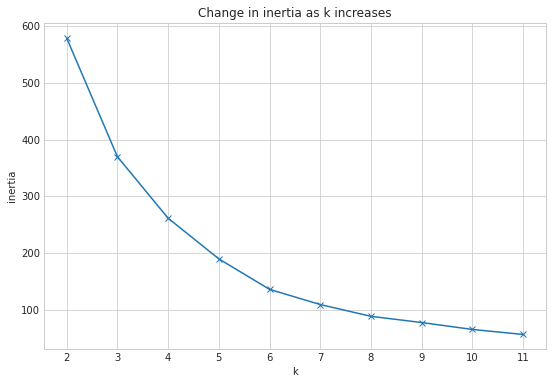

In [16]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

Clusters based on Weight and Height of Pokemon


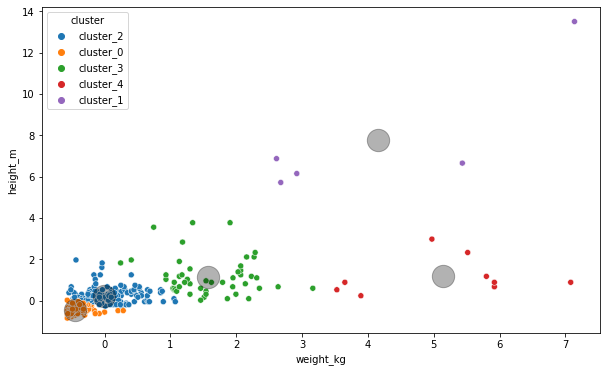

In [17]:
X_train_scaled, X_scaled, scaler, kmeans, centroids = create_cluster(X_train_scaled, X, 5)
create_scatter_plot('weight_kg','height_m',X_train_scaled,kmeans, X_scaled, scaler)
print('Clusters based on Weight and Height of Pokemon')

In [18]:
X = X_train_scaled[['weight_kg', 'height_m']]

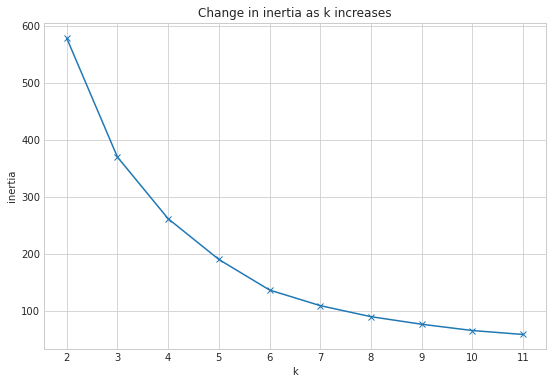

In [19]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

In [20]:
# def make_cluster(X_train_scaled, X, n, variable_1, variable_2):
#     X_train_scaled, X_scaled, scaler, kmeans, centroids = create_cluster(X_train_scaled, X, n)
#     create_scatter_plot(variable_1, variable_2,X_train_scaled,kmeans, X_scaled, scaler)
#     print(f'Clusters based on {variable_1} and {variable_2} of Pokemon')

Clusters based on weight_kg and height_m of Pokemon


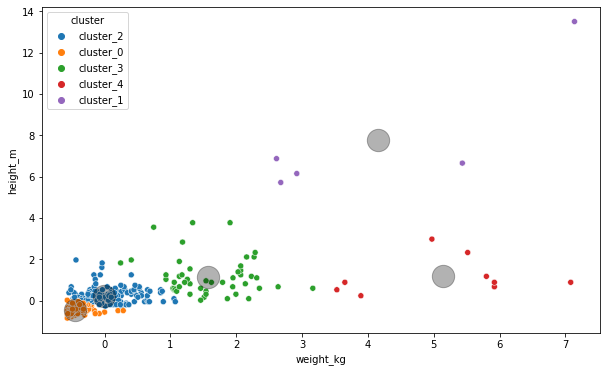

In [21]:
make_cluster(X_train_scaled, X, 5, 'weight_kg','height_m')

In [22]:
# def make_cluster(X_train_scaled, n, variable_1, variable_2):
#     X = X_train_scaled[[variable_1,variable_2]]
#     X_train_scaled, X_scaled, scaler, kmeans, centroids = create_cluster(X_train_scaled, X, n)
#     create_scatter_plot(variable_1, variable_2,X_train_scaled,kmeans, X_scaled, scaler)
#     print(f'Clusters based on {variable_1} and {variable_2} of Pokemon')

Clusters based on weight_kg and height_m of Pokemon


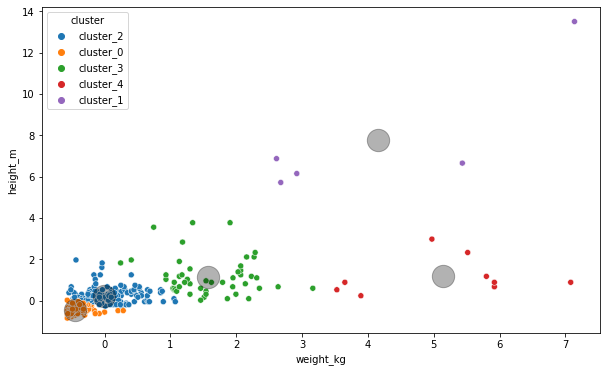

In [23]:
make_cluster(X_train_scaled, 5, 'weight_kg','height_m')

In [24]:
X = X_train_scaled[['speed', 'height_m']]

In [25]:
# def inertia(X):  
#     with plt.style.context('seaborn-whitegrid'):
#         plt.figure(figsize=(9, 6))
#         pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
#         plt.xticks(range(2, 12))
#         plt.xlabel('k')
#         plt.ylabel('inertia')
#         plt.title('Change in inertia as k increases')

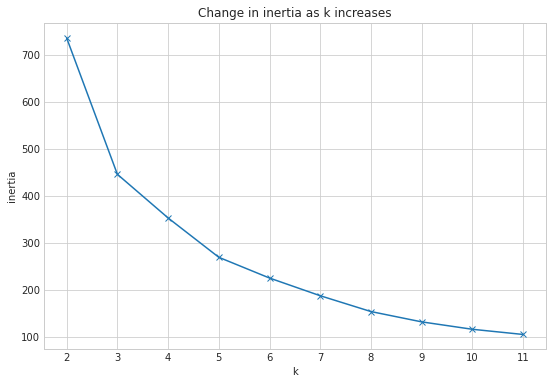

In [26]:
inertia(X)

Clusters based on speed and height_m of Pokemon


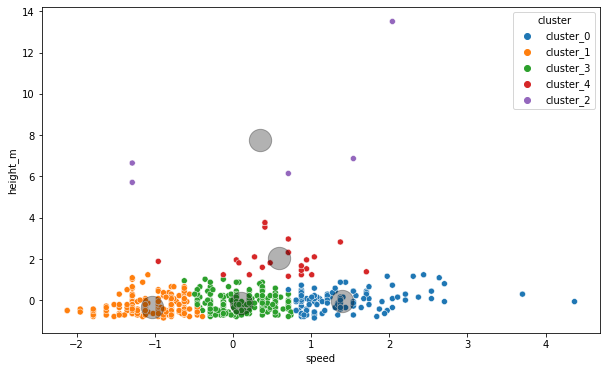

In [27]:
make_cluster(X_train_scaled, 5, 'speed','height_m')

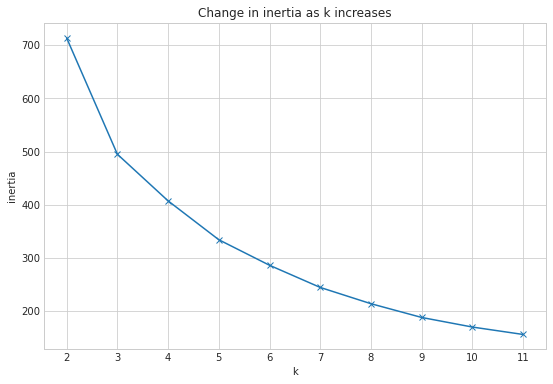

In [28]:
X = X_train_scaled[['speed', 'hp']]
inertia(X)

Clusters based on speed and hp of Pokemon


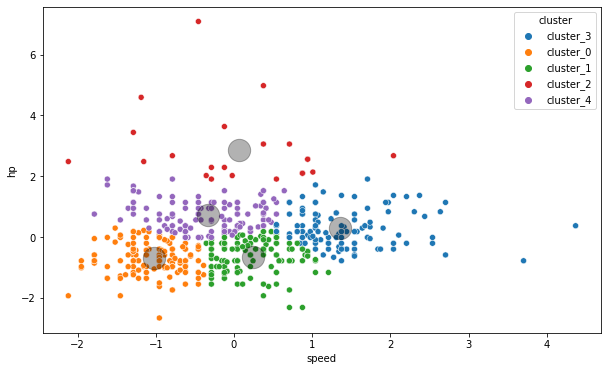

In [29]:
make_cluster(X_train_scaled, 5, 'speed','hp')

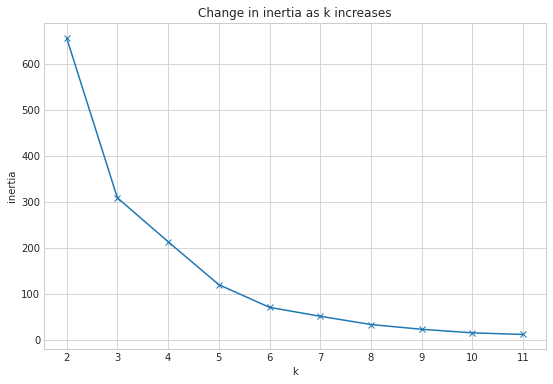

In [30]:
X = X_train_scaled[['against_grass', 'against_fire']]
inertia(X)

Clusters based on against_grass and against_fire of Pokemon


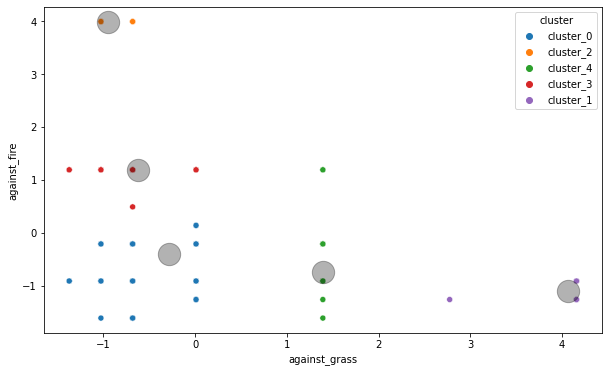

In [31]:
make_cluster(X_train_scaled, 5, 'against_grass','against_fire')

Clusters based on against_grass and against_fire of Pokemon


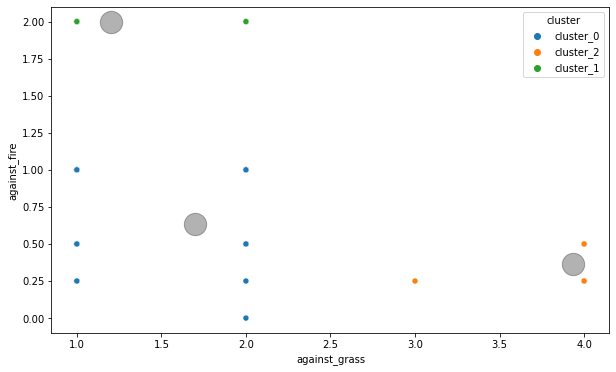

In [51]:
make_cluster(train[train["is_weakness"]== 1], 3, 'against_grass','against_fire')

In [38]:
X_train_scaled

,type_number,height_m,weight_kg,abilities_number,total_points,hp,attack,defense,sp_attack,sp_defense,...,against_flying,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy,cluster
305,0.998280,0.449238,-0.119404,-1.578175,1.559665,-0.011634,0.911075,-0.019151,2.139428,0.420638,...,1.400589,0.011916,1.886112,-0.329777,-0.057049,2.751460,-0.171299,0.021006,1.959600,cluster_0
36,0.998280,-0.416219,-0.242696,-0.323839,-1.178646,-0.779742,-0.193151,0.448361,-1.884794,-1.340863,...,-1.095553,-1.053154,-0.818531,-0.329777,-0.057049,-1.225153,-0.171299,0.021006,-1.179723,cluster_2
759,-1.001723,-0.632583,-0.490903,-0.323839,-1.120561,-1.163797,-1.139631,-1.110012,-0.334723,-0.460112,...,-0.263506,0.011916,-0.818531,1.161278,-0.057049,0.100385,-0.171299,-0.955350,-1.179723,cluster_0
476,-1.001723,-0.560462,-0.404923,0.930497,-1.593542,-0.434094,-1.139631,-1.110012,-1.139568,-1.164713,...,-0.263506,0.011916,0.083017,-0.329777,-1.756806,0.100385,-0.171299,0.021006,-0.133282,cluster_0
278,0.998280,0.449238,-0.165639,-1.578175,1.310728,0.180393,0.280089,0.448361,1.990383,0.596788,...,-0.263506,-2.118223,0.083017,1.161278,-0.906927,0.100385,-1.202643,-0.955350,-0.133282,cluster_0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396,0.998280,-0.632583,-0.557416,-0.323839,-1.095667,-0.971769,-1.297378,-0.486663,-0.990522,0.068338,...,-0.263506,0.011916,-0.818531,1.161278,-1.756806,0.100385,-0.171299,0.021006,-0.133282,cluster_0
388,-1.001723,-0.416219,-0.318943,0.930497,-0.929709,-0.395688,-1.770618,-1.265849,-0.096251,0.244488,...,-0.263506,-1.053154,1.886112,-0.329777,1.642708,0.100385,1.891389,0.021006,-0.133282,cluster_0
778,-1.001723,-0.127733,-0.486036,-0.323839,0.912428,0.295609,-0.508645,-0.237323,1.155729,2.851509,...,-0.263506,0.011916,-0.818531,-0.329777,-0.057049,-2.550691,-1.202643,1.973717,-0.133282,cluster_0
14,-1.001723,-0.416219,-0.486847,-1.578175,-1.966948,-0.779742,-1.928364,-0.642500,-1.437658,-1.693163,...,1.400589,0.011916,0.083017,1.161278,-0.057049,0.100385,-0.171299,0.021006,-0.133282,cluster_3


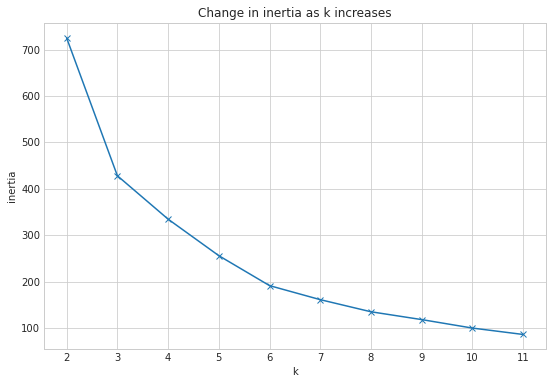

In [39]:
X = X_train_scaled[['speed', 'against_fire']]
inertia(X)

Clusters based on speed and against_fire of Pokemon


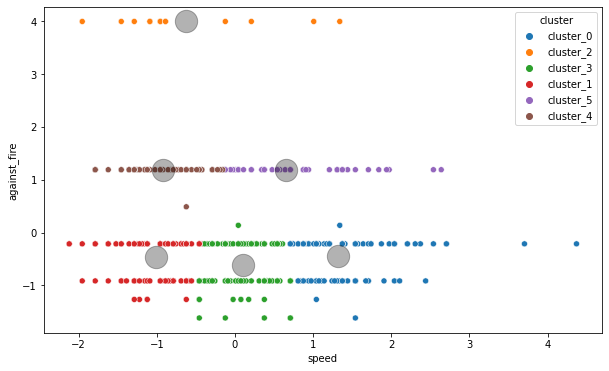

In [42]:
make_cluster(X_train_scaled, 6, 'speed','against_fire')

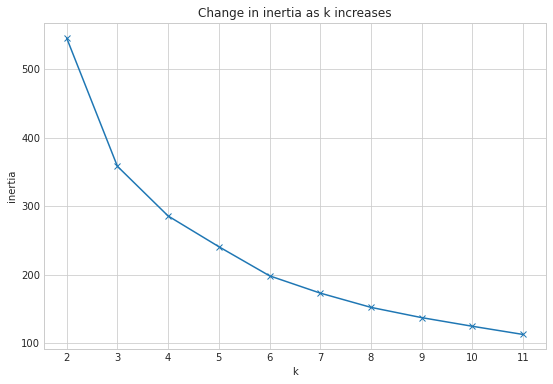

In [43]:
X = X_train_scaled[['hp', 'total_points']]
inertia(X)

Clusters based on hp and total_points of Pokemon


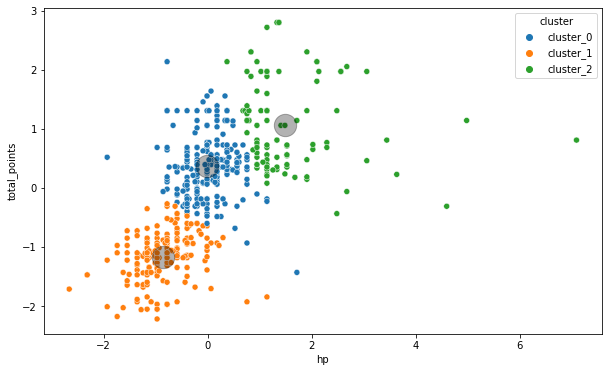

In [44]:
make_cluster(X_train_scaled, 3, 'hp','total_points')

Clusters based on hp and total_points of Pokemon


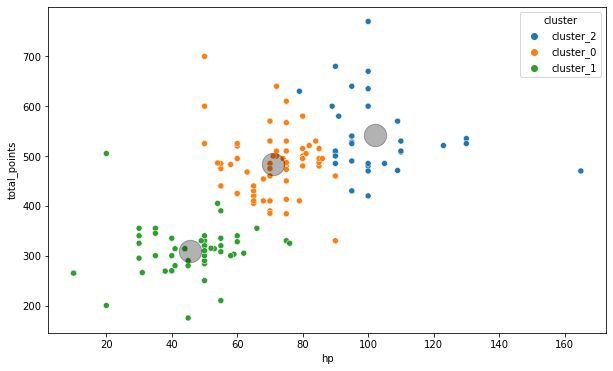

In [50]:
make_cluster(train[train["is_weakness"]== 1], 3, 'hp','total_points')

In [49]:
train

,pokedex_number,name,generation,status,species,type_number,type_1,type_2,height_m,weight_kg,...,against_flying,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy,is_weakness
305,254,Mega Sceptile,3,Normal,Forest Pokémon,2,Grass,Dragon,1.9,55.2,...,2.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,2.0,0
36,27,Alolan Sandshrew,1,Normal,Mouse Pokémon,2,Ice,Steel,0.7,40.0,...,0.5,0.5,0.5,1.0,1.0,0.5,1.0,1.0,0.5,0
759,653,Fennekin,6,Normal,Fox Pokémon,1,Fire,None,0.4,9.4,...,1.0,1.0,0.5,2.0,1.0,1.0,1.0,0.5,0.5,0
476,399,Bidoof,4,Normal,Plump Mouse Pokémon,1,Normal,None,0.5,20.0,...,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0
278,229,Mega Houndoom,2,Normal,Dark Pokémon,2,Dark,Fire,1.9,49.5,...,1.0,0.0,1.0,2.0,0.5,1.0,0.5,0.5,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396,333,Swablu,3,Normal,Cotton Bird Pokémon,2,Normal,Flying,0.4,1.2,...,1.0,1.0,0.5,2.0,0.0,1.0,1.0,1.0,1.0,0
388,325,Spoink,3,Normal,Bounce Pokémon,1,Psychic,None,0.7,30.6,...,1.0,0.5,2.0,1.0,2.0,1.0,2.0,1.0,1.0,0
778,671,Florges,6,Normal,Garden Pokémon,1,Fairy,None,1.1,10.0,...,1.0,1.0,0.5,1.0,1.0,0.0,0.5,2.0,1.0,0
14,11,Metapod,1,Normal,Cocoon Pokémon,1,Bug,None,0.7,9.9,...,2.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,0


In [56]:
train[train.is_weakness==1].against_fire.max()

2.0